## **Exploratory Data Analysis**

### **IMPORTS**

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("..")

In [ ]:
import pandas as pd

### **EXPLORATORY**

In [42]:
offers = pd.read_json("data/raw/offers.json")
customers = pd.read_json("data/raw/profile.json")
transactions = pd.read_json("data/raw/transactions.json")

In [43]:
offers["id"].duplicated().any(), customers["id"].duplicated().any(), transactions["account_id"].duplicated().any()

(False, False, True)

#### **offers**

In [6]:
# Sem incoerências de negócio com relação ao desconto dado vs. valor mínimo do pedido
(offers["discount_value"] > offers["min_value"]).any()

False

In [7]:
# Dados sem nulos e sem problemas com tipos
offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   channels        10 non-null     object
 1   min_value       10 non-null     int64 
 2   duration        10 non-null     int64 
 3   id              10 non-null     object
 4   offer_type      10 non-null     object
 5   discount_value  10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


#### **profile**

In [44]:
print(customers.shape)
customers.head()

(17000, 5)


,age,registered_on,gender,id,credit_card_limit
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


In [45]:
# Quantidade de nulos semelhante em `gender` e `credit_card_limit`
# Coluna de data `registered_on` com tipo para ser ajustado
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                17000 non-null  int64  
 1   registered_on      17000 non-null  int64  
 2   gender             14825 non-null  object 
 3   id                 17000 non-null  object 
 4   credit_card_limit  14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [46]:
# Todos os nulos dessa base possuem ambos gênero e limite do cartão nulos
(
    (customers["gender"].isna() & customers["credit_card_limit"].notna()).any(), 
    (customers["gender"].notna() & customers["credit_card_limit"].isna()).any()
)

(False, False)

In [47]:
# Ajuste do formato da data
customers["registered_on"] = pd.to_datetime(customers["registered_on"], format="%Y%m%d")

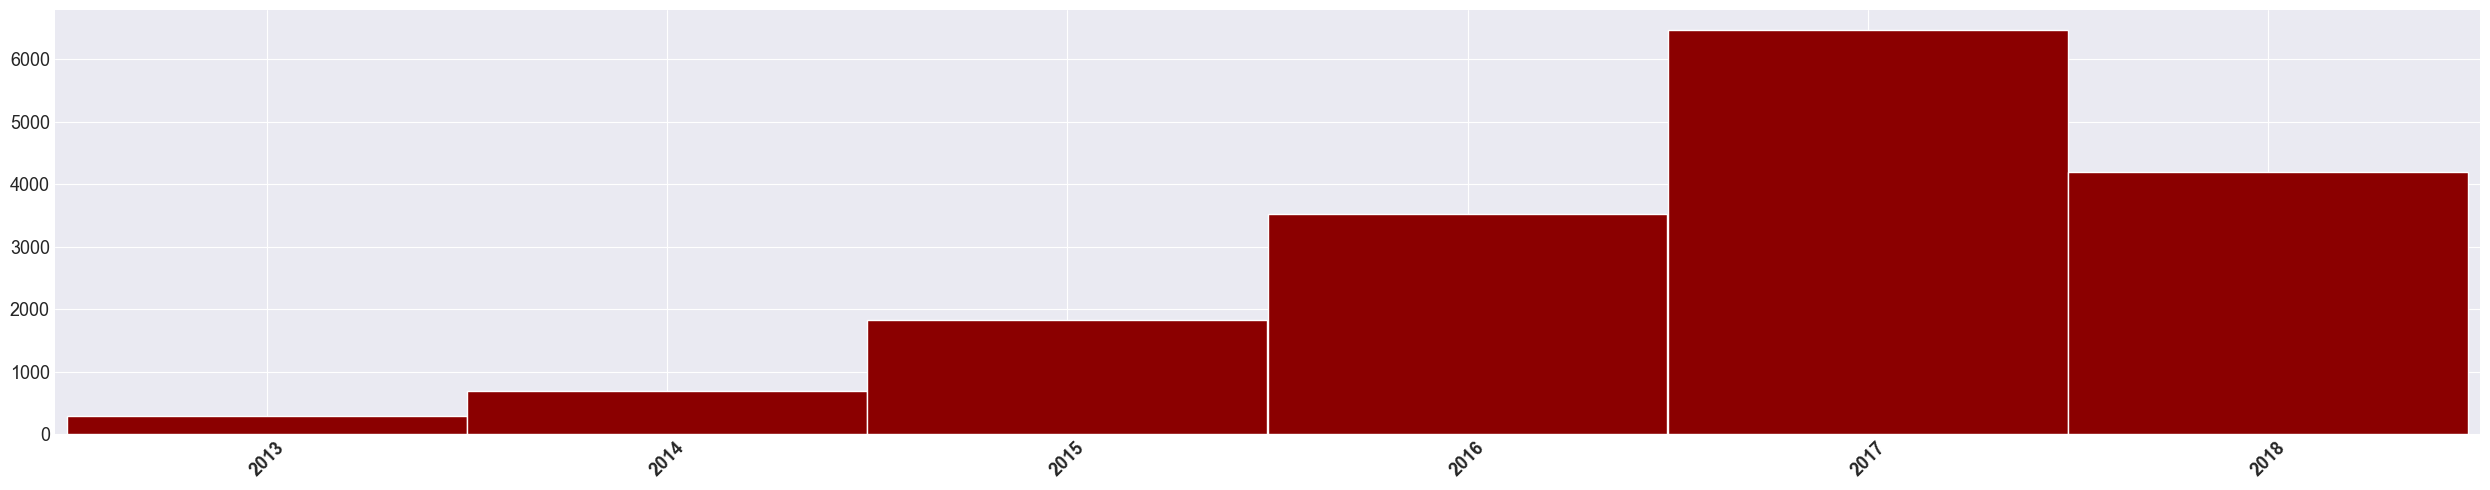

In [98]:
from src.plots import plot_distribution
by_year = customers["registered_on"].dt.year
plot_distribution(by_year)

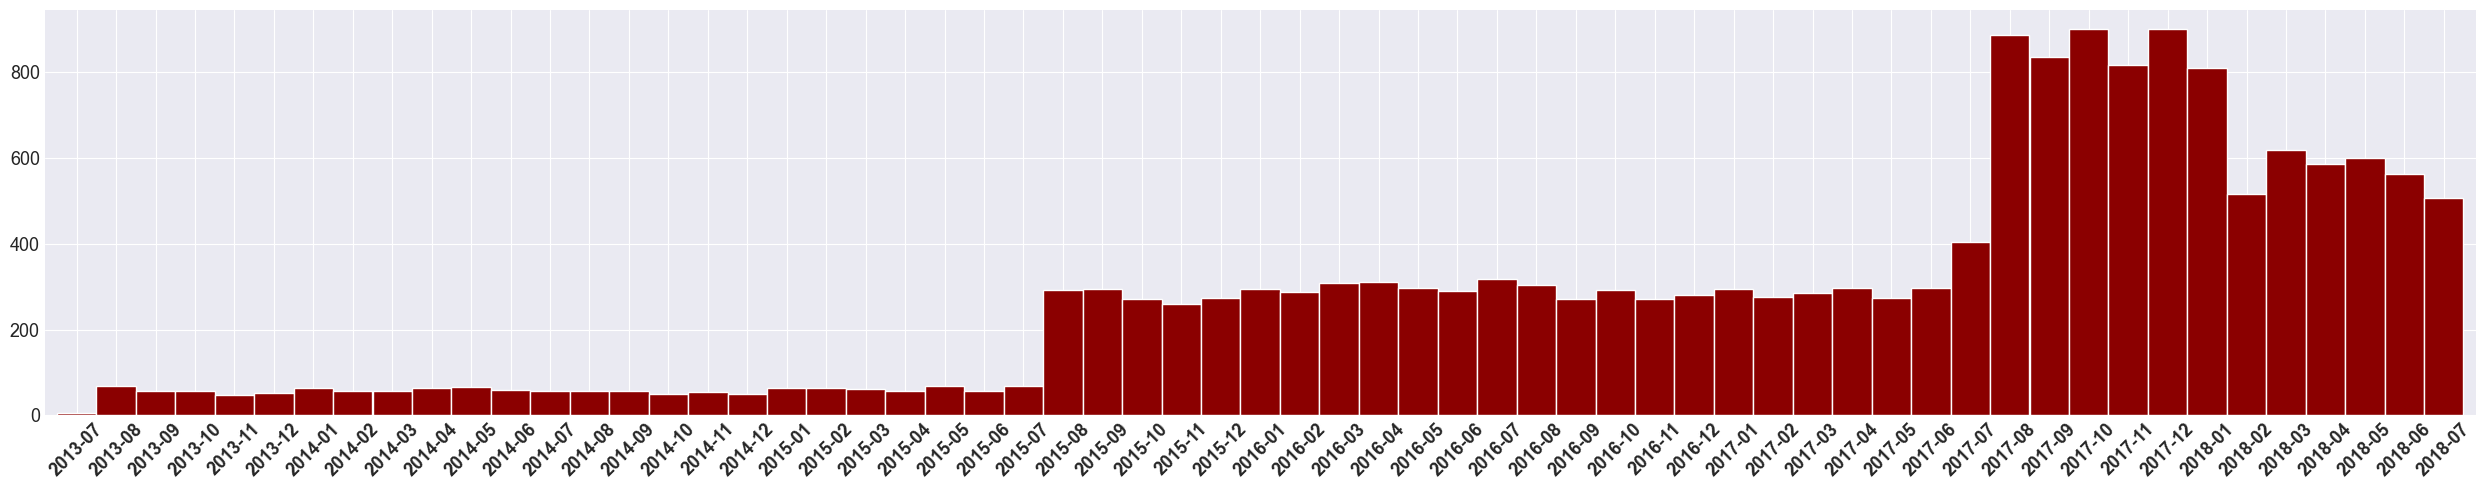

In [99]:
by_cohort = pd.to_datetime(customers["registered_on"]).dt.strftime("%Y-%m").sort_values()
plot_distribution(by_cohort)

In [50]:
# Gênero "O", possivelmente para "Outros"
# Sem valores estranhos para essa coluna
customers["gender"].value_counts(dropna=False)

gender
M       8484
F       6129
None    2175
O        212
Name: count, dtype: int64

In [51]:
# Outlier em `age` com valor estranho
customers["age"].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

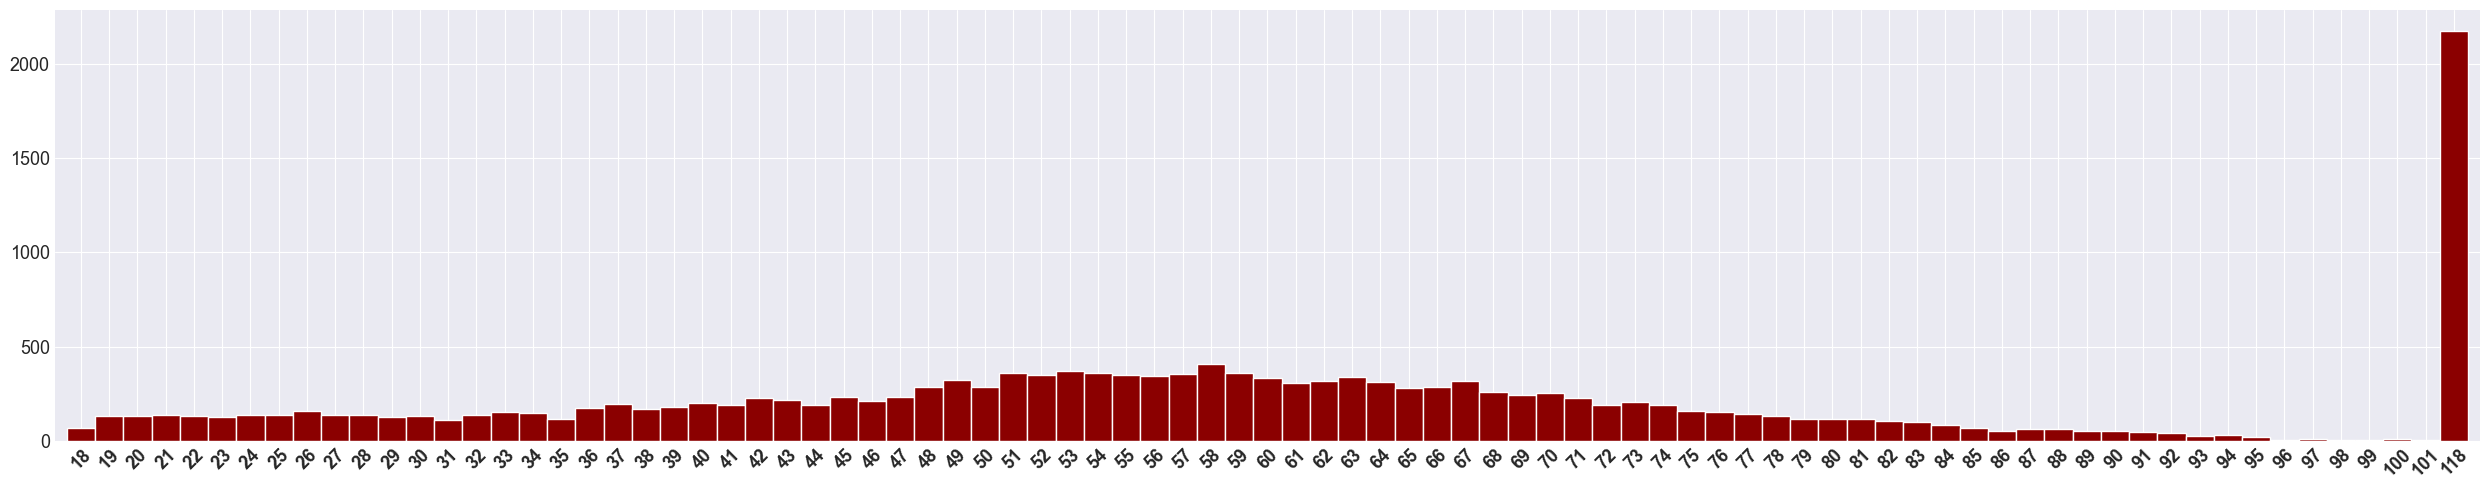

In [102]:
plot_distribution(customers["age"])

In [53]:
# Os mesmos dados que possuem `gender` e `credit_card_limit` nulos, possuem outlier em `age`
# Possivelmente um placeholder para nulos
customers[customers["age"] == 118].shape, customers["gender"].isna().sum(), ((customers["age"] == 118) & (customers["gender"].notna())).any()

((2175, 5), 2175, False)

In [54]:
# O menor valor de limite para cartão de crédito ainda é um valor bem alto
customers["credit_card_limit"].describe()

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: credit_card_limit, dtype: float64

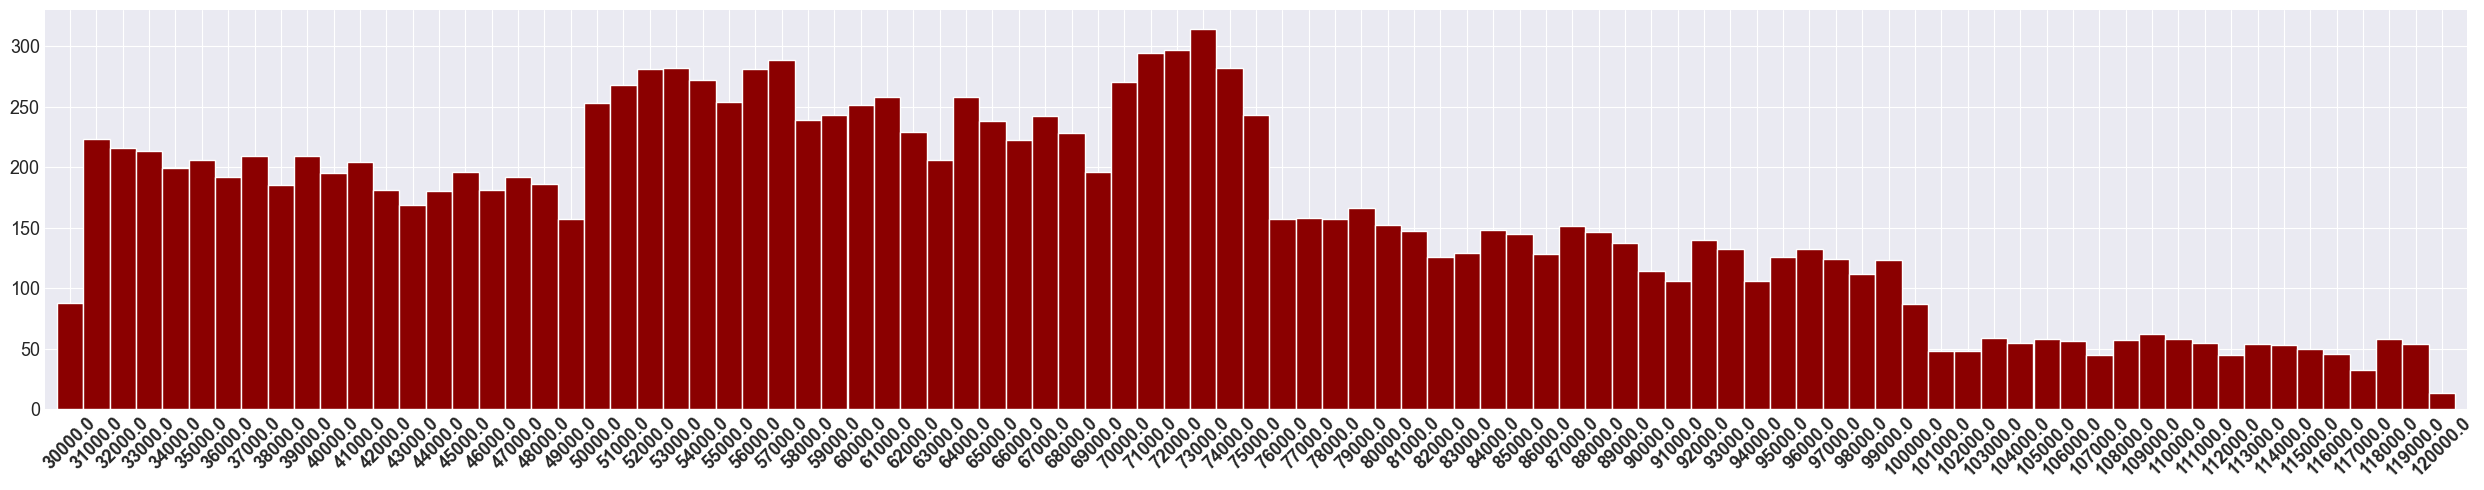

In [103]:
plot_distribution(customers["credit_card_limit"])

#### **transactions**

In [23]:
transactions.head()

,event,account_id,value,time_since_test_start
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,"{'amount': None, 'offer id': '9b98b8c7a33c4b65...",0.0
1,offer received,a03223e636434f42ac4c3df47e8bac43,"{'amount': None, 'offer id': '0b1e1539f2cc45b7...",0.0
2,offer received,e2127556f4f64592b11af22de27a7932,"{'amount': None, 'offer id': '2906b810c7d44117...",0.0
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,"{'amount': None, 'offer id': 'fafdcd668e3743c1...",0.0
4,offer received,68617ca6246f4fbc85e91a2a49552598,"{'amount': None, 'offer id': '4d5c57ea9a6940dd...",0.0


In [24]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   event                  306534 non-null  object 
 1   account_id             306534 non-null  object 
 2   value                  306534 non-null  object 
 3   time_since_test_start  306534 non-null  float64
dtypes: float64(1), object(3)
memory usage: 9.4+ MB


In [25]:
transactions["event"].value_counts(dropna=False)

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [26]:
# sem valores estranhos para o tempo desde início do teste
transactions["time_since_test_start"].describe()

count    306534.000000
mean         15.265956
std           8.346930
min           0.000000
25%           7.750000
50%          17.000000
75%          22.000000
max          29.750000
Name: time_since_test_start, dtype: float64

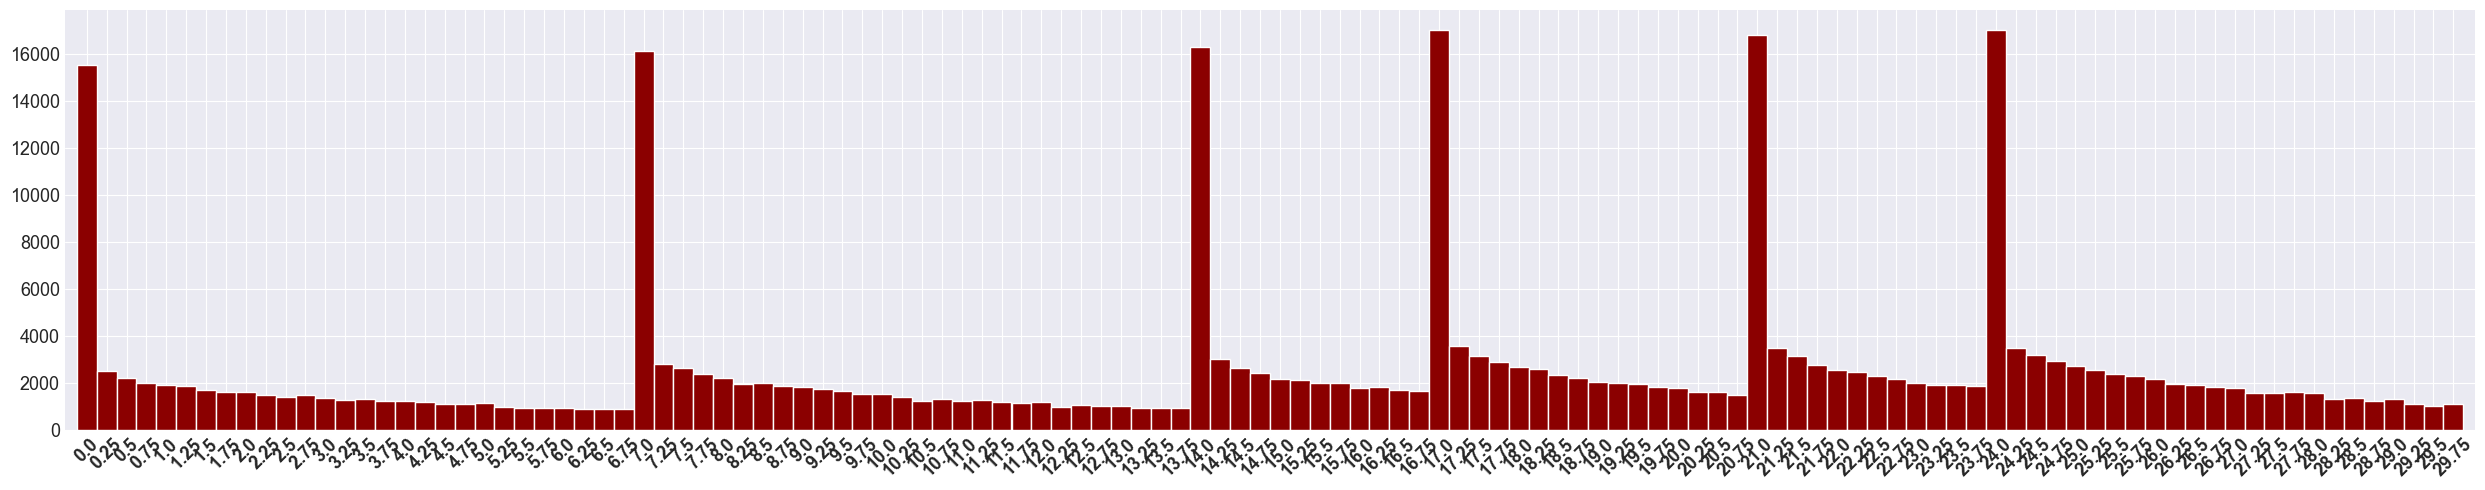

In [105]:
# Há algum tipo de sazonalidade no volume de eventos gerados
# Possibilidade de estar relacionado com o envio de ofertas
plot_distribution(transactions["time_since_test_start"])

In [28]:
# Expandindo informações contidas em `value`
transactions_ = pd.concat([transactions.drop(columns=["value"]), transactions["value"].apply(pd.Series)], axis=1)

In [29]:
# Duas colunas com id da oferta, com a segunda coincidindo em número de nulos com `reward`
transactions_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   event                  306534 non-null  object 
 1   account_id             306534 non-null  object 
 2   time_since_test_start  306534 non-null  float64
 3   amount                 138953 non-null  float64
 4   offer id               134002 non-null  object 
 5   offer_id               33579 non-null   object 
 6   reward                 33579 non-null   float64
dtypes: float64(3), object(4)
memory usage: 16.4+ MB


In [30]:
# Sem casos onde ambas as colunas possuem valores (sem múltiplos `offer_id` para um mesmo evento)
(transactions_["offer id"].notna() & transactions_["offer_id"].notna()).any()

False

In [31]:
(
    (transactions_["offer id"].notna() & transactions_["offer_id"].isna()).sum(),
    (transactions_["offer id"].isna() & transactions_["offer_id"].notna()).sum(),
    (transactions_["offer id"].isna() & transactions_["offer_id"].isna()).sum()
)

(134002, 33579, 138953)

In [32]:
# Todos os eventos com `offer_id` possuem valor de `reward`
# Nenhum evento com `offer id` possui valor de `reward`
(
    transactions_[transactions_["offer_id"].notna()]["reward"].isna().any(), 
    transactions_[transactions_["offer id"].notna()]["reward"].isna().all()
)

(False, True)

In [33]:
# Eventos com `offer id` preenchido são aquelas que não geraram `reward`
# Possivelmente por não terem atingido os requisitos necessários
transactions_.loc[transactions_["offer id"].notna(), "event"].value_counts(dropna=False)

event
offer received    76277
offer viewed      57725
Name: count, dtype: int64

In [34]:
# Eventos com `offer_id` preenchido possuem status de `completas`
# Possivelmente referente aos requisitos da oferta
transactions_.loc[transactions_["offer_id"].notna(), "event"].value_counts(dropna=False)

event
offer completed    33579
Name: count, dtype: int64

In [35]:
# Nenhum evento com `offer_id` ou com `offer id` possui valor de `amount` (transação)
(
    transactions_[transactions_["offer_id"].notna()]["amount"].isna().all(),
    transactions_[transactions_["offer id"].notna()]["amount"].isna().all(),
)

(True, True)

In [36]:
# Todos os eventos com valor de `amount` estão sob a descrição de `transaction`
transactions_.loc[transactions_["amount"].notna(), "event"].value_counts(dropna=False)

event
transaction    138953
Name: count, dtype: int64

In [40]:
# Todas as ofertas existentes possuem algum evento associado
# Não há nenhum id de oferta que não esteja registrado na base de ofertas
(
    set(offers["id"].unique()) - set(transactions_["offer id"].value_counts().index),
    set(transactions_["offer_id"].value_counts().index) - set(offers["id"].unique())
)

(set(), set())